# Projet : Consommation et production électrique en France

## <a id='toc1_6_'></a>[Exploration du dataset Régional](#toc0_)

### <a id='toc1_6_1_'></a>[Réflexion](#toc0_)

Attention à bien nuancer nos propos dans cette partie là : chaque région n'est pas égale en population, en superficie,... 
- https://www.ined.fr/fr/tout-savoir-population/chiffres/france/structure-population/regions-departements/
- https://www.regions-departements-france.fr/regions-francaises.html

Pensez à réflechir à d'autres critères de comparaison reflétants ces disparités.   

### <a id='toc1_6_2_'></a>[Analyse générale](#toc0_)

On va commencer par une première exploration générale des données. 


&#x1F4A5; **To Do**


    - Tracer sur un même graphique la consommation des différentes régions en fonction du temps
    
    - Peut-on observer des différences comportementales significatives entre les régions ? (par ex entre une région du nord et une région du sud)
    
    - Quelles régions sont les plus consommatrices ? Même question en ramenant la réponse au nombre d'habitants ? Même question en ramenant la réponse au km2 ? Que pouvez-vous dire des résultats ? 
        
<br> 

**Ressources :** 
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html 
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html

#### <a id='toc1_6_2_1_'></a>[Solutions](#toc0_)

##### <a id='toc1_6_2_1_1_'></a>[Tracer sur un même graphique la consommation des différentes régions en fonction du temps](#toc0_)

In [4]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import glob
rcParams['figure.figsize'] = 15, 5

def create_datetime_index(df):
    df = df.copy()
    df.index = pd.to_datetime(df['Date'] + ' ' + df['Heures'])
    df = df.drop(['Date', 'Heures'], axis='columns')
    return df


def load_data(files):
    # Ceci est un générateur (économe en ressources)
    df_national = (
        pd.read_csv(f, encoding='ISO-8859-1', sep='\t', index_col=False, na_values=['ND', '-']) for f in files
    )

    # Utilisation de pipe
    df = (
        pd.concat(df_national)
        .dropna(
            subset=['Date', 'Heures', 'Consommation'],
            how='any')
        .fillna(0)
        .pipe(create_datetime_index)
    )

    return df
    
# Chargement des données régionales
FOLDER = './data_rte/'
files = [FOLDER + f for f in os.listdir(FOLDER)
         if not f.startswith('eCO2mix_RTE_Annuel-Definitif')]
df_regional = load_data(files)

df_regional.head()

,Périmètre,Nature,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
2015-01-01 00:00:00,Auvergne-Rhône-Alpes,Données définitives,9921.0,193.0,12423.0,54.0,0.0,3981.0,-7.0,107.0,-6830.0
2015-01-01 00:30:00,Auvergne-Rhône-Alpes,Données définitives,9819.0,201.0,12442.0,60.0,0.0,3964.0,-3.0,94.0,-6938.0
2015-01-01 01:00:00,Auvergne-Rhône-Alpes,Données définitives,9566.0,202.0,12451.0,58.0,0.0,3193.0,-3.0,92.0,-6427.0
2015-01-01 01:30:00,Auvergne-Rhône-Alpes,Données définitives,9584.0,204.0,12467.0,56.0,0.0,3215.0,-3.0,92.0,-6446.0
2015-01-01 02:00:00,Auvergne-Rhône-Alpes,Données définitives,9548.0,204.0,12476.0,51.0,0.0,3110.0,-3.0,95.0,-6385.0


In [6]:
df_regional = df_regional.sort_index()

/tmp/ipykernel_26501/517129953.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('1H')      # resample to see better


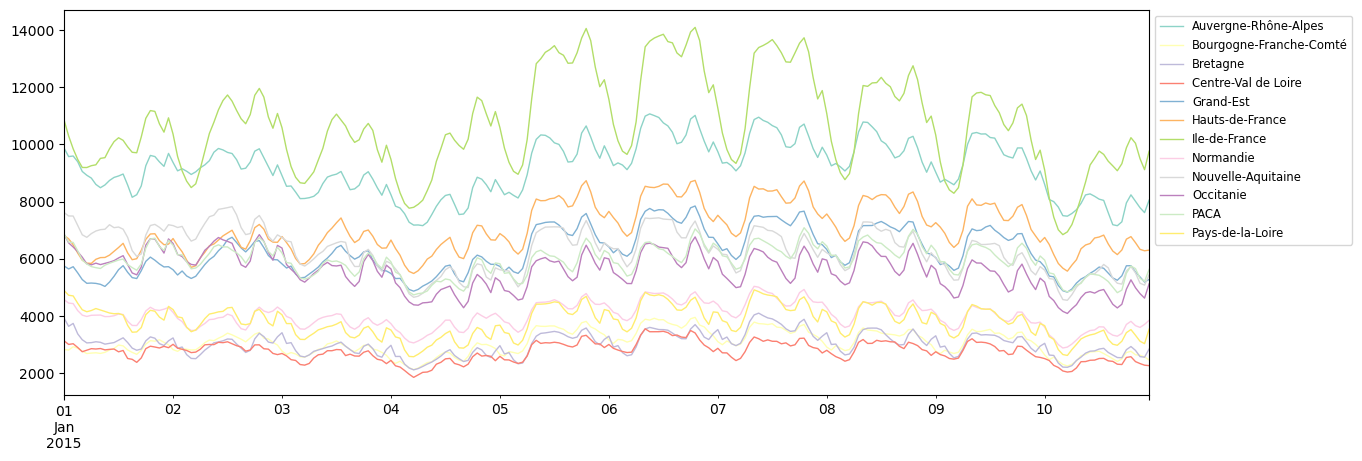

In [8]:
# En Janvier
(df_regional.loc["2015-Jan-01":"2015-Jan-10", :]
            .pivot(columns='Périmètre', values='Consommation')
            .resample('1H')      # resample to see better
            .mean()
            .plot(figsize=(14, 5),
                  lw=1,          # line width
                  cmap="Set3")   # choosing a "good colormap"
            .legend(bbox_to_anchor=(1, 1),  # placing legends
                    fontsize='small')
 )

/tmp/ipykernel_26501/647424737.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('1H')      # resample to see better


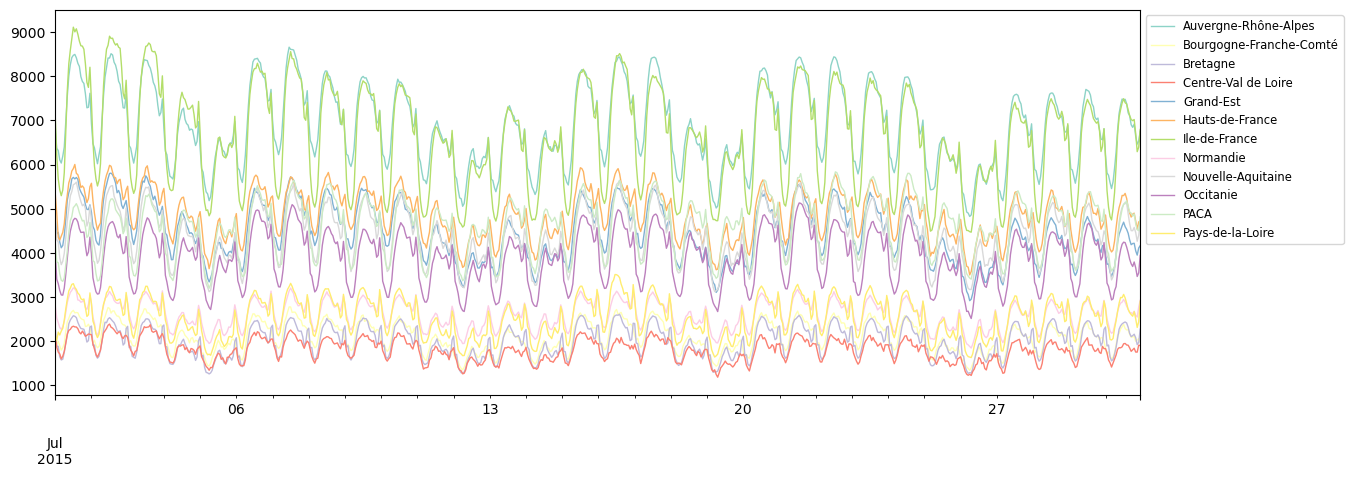

In [9]:
# En juillet
(df_regional.loc["2015-Jul-01":"2015-Jul-30", :]
            .pivot(columns='Périmètre', values='Consommation')
            .resample('1H')      # resample to see better
            .mean()
            .plot(figsize=(14, 5),
                  lw=1,          # line width
                  cmap="Set3")   # choosing a "good colormap"
            .legend(
    bbox_to_anchor=(1, 1),  # placing legends
    fontsize='small')
 )

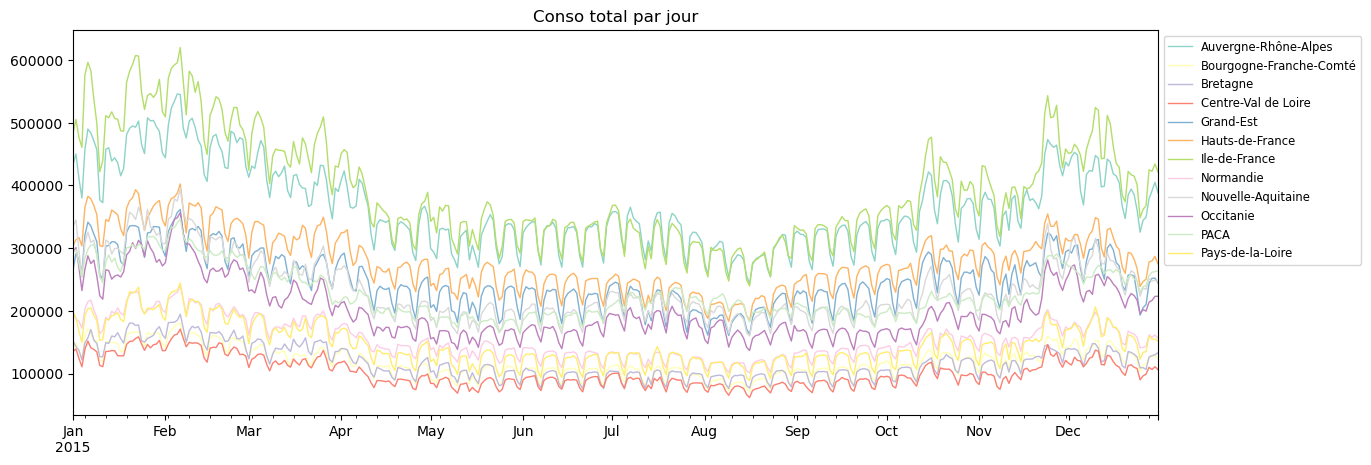

In [10]:
# Année 2015
(df_regional.loc["2015-Jan": "2015-Dec", :]
            .pivot(columns='Périmètre', values='Consommation')
            .resample('1D')      # resample to see better
            .sum()
            .plot(figsize=(14, 5),
                  lw=1,          # line width
                  cmap="Set3",   # choosing a "good colormap"
                  title="Conso total par jour")
            .legend(
    bbox_to_anchor=(1, 1),  # placing legends
    fontsize='small')
 )

In [11]:
df_regional.loc["2015-Jan-01":"2015-Jan-15",
                :].pivot(columns='Périmètre', values='Consommation')

Périmètre,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Grand-Est,Hauts-de-France,Ile-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,PACA,Pays-de-la-Loire
2015-01-01 00:00:00,9921.0,2772.0,3965.0,3263.0,5779.0,6843.0,10949.0,4580.0,7612.0,6910.0,7005.0,4897.0
2015-01-01 00:30:00,9819.0,2892.0,3885.0,3008.0,5725.0,6784.0,10750.0,4564.0,7622.0,6809.0,6730.0,4893.0
2015-01-01 01:00:00,9566.0,2812.0,3729.0,2984.0,5619.0,6648.0,10408.0,4454.0,7402.0,6602.0,6571.0,4712.0
2015-01-01 01:30:00,9584.0,2811.0,3555.0,3034.0,5675.0,6754.0,10184.0,4454.0,7596.0,6514.0,6600.0,4745.0
2015-01-01 02:00:00,9548.0,2906.0,3757.0,3034.0,5734.0,6545.0,9870.0,4503.0,7482.0,6442.0,6523.0,4790.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-15 21:30:00,8771.0,3046.0,3181.0,2719.0,6189.0,7200.0,10667.0,4226.0,5835.0,5145.0,5711.0,3798.0
2015-01-15 22:00:00,8512.0,2967.0,3154.0,2629.0,5989.0,7124.0,10176.0,4155.0,5677.0,4939.0,5582.0,3688.0
2015-01-15 22:30:00,8536.0,2917.0,3144.0,2587.0,6000.0,6977.0,10247.0,4246.0,5750.0,4958.0,5588.0,3688.0
2015-01-15 23:00:00,8812.0,2884.0,3460.0,2582.0,5988.0,6946.0,10741.0,4330.0,5980.0,5550.0,5621.0,4224.0


L'IDF et l'AURA sont les plus gros consommateurs, tandis que le CVDL et BFC consomment moins <br/>

##### <a id='toc1_6_2_1_2_'></a>[Quelles régions sont les plus consommatrices ? Même question en ramenant la réponse au nombre d'habitants ? Même question en ramenant la réponse au km2 ?](#toc0_)

In [12]:
# Population moyenne entre 2013 et 2018
data_regions_population = pd.Series({
    "Auvergne-Rhône-Alpes": 6682755,
    "Bourgogne-Franche-Comté": 2788566,
    "Bretagne": 3336547,
    "Centre-Val de Loire": 2491894,
    "Grand-Est": 5564524,
    "Hauts-de-France": 5968186,
    "Ile-de-France": 12218464,
    "Normandie": 3387158,
    "Nouvelle-Aquitaine": 5951645,
    "Occitanie": 5883118,
    "Pays-de-la-Loire": 3740368,
    "PACA": 5074089
})

# On créé un dataframe avec Noms de région en colonne et comme valeur la consommation. Index = timestamp.
pivot = df_regional.loc["2015-Jan-01":"2015-Jan-15", :] \
                   .pivot(columns='Périmètre', values='Consommation')

# On divise la consommation par le nombre d'habitants par région
df_per_inhabitant = pivot.div(data_regions_population)

/tmp/ipykernel_26501/2346725170.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('1H')              # resample to see better


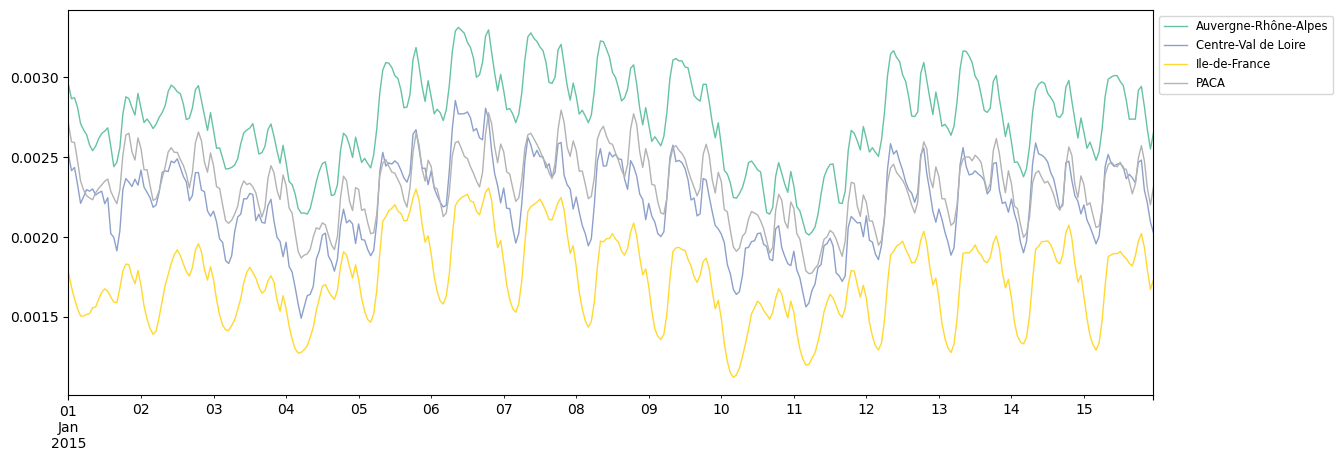

In [13]:
subset = ["Auvergne-Rhône-Alpes",
          "Centre-Val de Loire",  "Ile-de-France", "PACA"]
(df_per_inhabitant[subset]
 .resample('1H')              # resample to see better
 .sum()
 .plot(figsize=(14, 5),
       lw=1,                  # line width
       cmap="Set2")          # choosing a "good colormap"
 .legend(
    bbox_to_anchor=(1, 1),  # placing legends
    fontsize='small')
 )

### <a id='toc1_6_3_'></a>[Etude de la production non renouvelable.](#toc0_)

&#x1F4A5; **To Do**

    - Dans quelles régions produit-t-on le plus d'électricité d'origine non renouvelable ? 
    
    - Quelle est l'évolution de la production d'électricité d'origine non renouvelable ? 
    
    - Afficher la production nucléaire totale par région sur l'ensemble de la période . Dans quelles régions sont situées les centrales nucléaires ? Dans quelles régions n'y a-t-il pas de centrale nucléaire ?   

#### <a id='toc1_6_3_1_'></a>[Solution](#toc0_)

##### <a id='toc1_6_3_1_1_'></a>[Dans quelles régions produit-t-on le plus d'électricité d'origine non renouvelable ?](#toc0_)

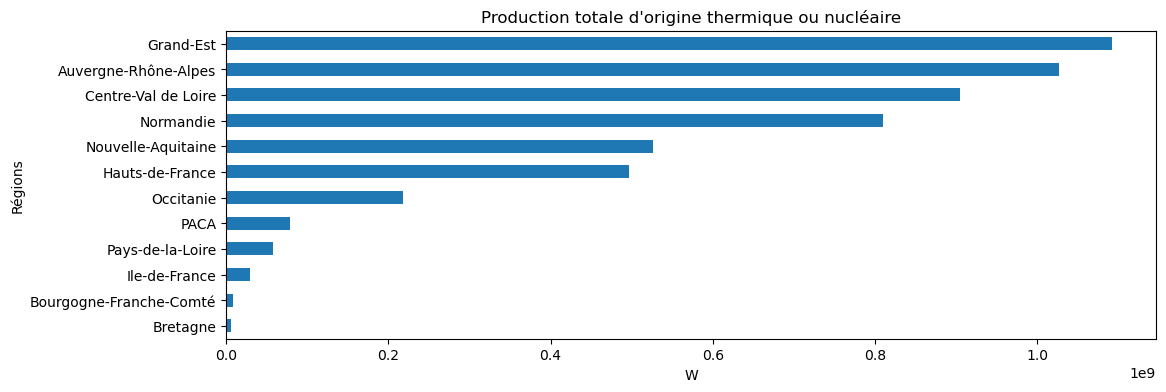

In [14]:
sources_non_renouvelables = ['Périmètre', 'Thermique', 'Nucléaire']

(df_regional[sources_non_renouvelables]
 .groupby("Périmètre")
 .sum()
 .sum(axis=1)
 .sort_values()
 .plot.barh(
    xlabel="W",
    ylabel='Régions',
    title="Production totale d'origine thermique ou nucléaire",
    figsize=(12, 4)
)
)

plt.show()

##### <a id='toc1_6_3_1_2_'></a>[Afficher la production nucléaire totale par région sur l'ensemble de la période . Dans quelles régions sont situées les centrales nucléaires ? Dans quelles régions n'y a-t-il pas de centrale nucléaire ?](#toc0_)

In [15]:
df_regional.pivot(columns='Périmètre', values='Nucléaire')

Périmètre,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Grand-Est,Hauts-de-France,Ile-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,PACA,Pays-de-la-Loire
2013-01-01 00:30:00,12069.0,0.0,0.0,9085.0,9137.0,4499.0,0.0,8200.0,4993.0,2497.0,0.0,0.0
2013-01-01 01:00:00,11895.0,0.0,0.0,9022.0,9010.0,4500.0,0.0,8224.0,4962.0,2451.0,0.0,0.0
2013-01-01 01:30:00,12228.0,0.0,0.0,9397.0,9074.0,4499.0,0.0,8380.0,5069.0,1772.0,0.0,0.0
2013-01-01 02:00:00,12274.0,0.0,0.0,9456.0,9072.0,4497.0,0.0,8317.0,5076.0,1549.0,0.0,0.0
2013-01-01 02:30:00,12228.0,0.0,0.0,9382.0,9043.0,4495.0,0.0,8129.0,5059.0,1551.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 21:30:00,11665.0,0.0,0.0,10209.0,12199.0,5488.0,0.0,6968.0,6531.0,2619.0,0.0,0.0
2018-12-31 22:00:00,11620.0,0.0,0.0,10164.0,12142.0,5486.0,0.0,6904.0,6470.0,2617.0,0.0,0.0
2018-12-31 22:30:00,11588.0,0.0,0.0,10125.0,12098.0,5488.0,0.0,6864.0,6407.0,2618.0,0.0,0.0
2018-12-31 23:00:00,11611.0,0.0,0.0,10152.0,12249.0,5484.0,0.0,7026.0,6450.0,2617.0,0.0,0.0


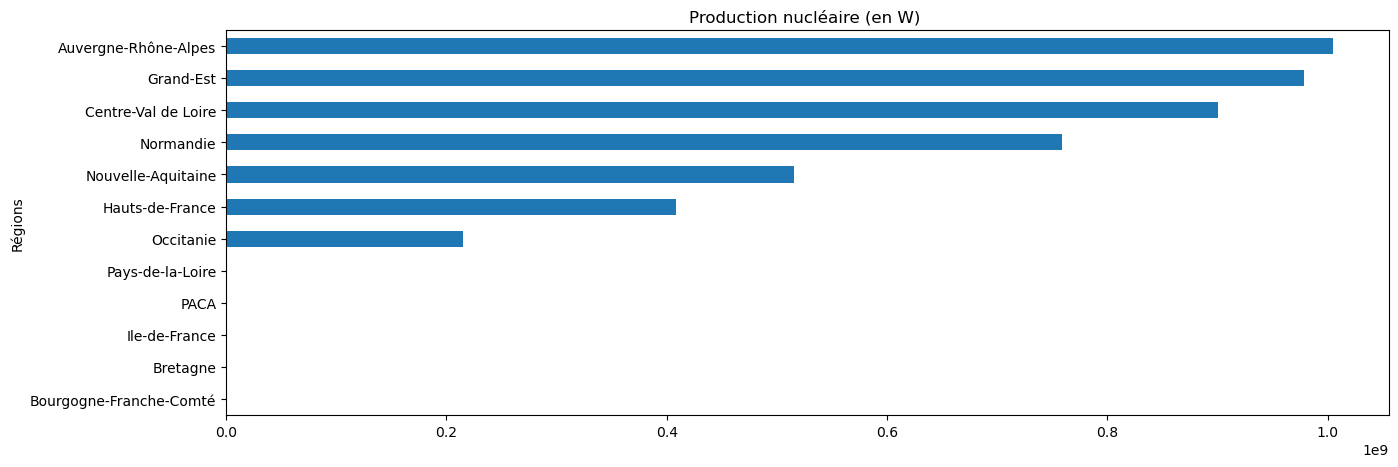

In [16]:
(
    df_regional.pivot(columns='Périmètre', values='Nucléaire')
               .sum()
               .sort_values()
               .plot.barh(xlabel="", ylabel="Régions", title="Production nucléaire (en W) ")
)

plt.show()

### <a id='toc1_6_4_'></a>[Etude de la production renouvelable](#toc0_)


&#x1F4A5; **To Do**

    - Quelle région produit le plus d'électricité d'origine renouvelable ?

    - Quelle évolution sur les dernières années ? Faîtes un joli graphique. 
   
    - Quelle région a le meilleur taux " énergie produite VS puissance installée " ? 
    Vous pourrez assimiler la puissance installée comme étant égale au maximum produit. Attention à bien définir vos critères, cette capacité peut augmenter dans le temps...

#### <a id='toc1_6_4_1_'></a>[Solutions](#toc0_)

##### <a id='toc1_6_4_1_1_'></a>[Quelle région produit le plus d'électricité d'origine renouvelable ?](#toc0_)

In [ ]:
sources_renouvelables = ['Périmètre', 'Eolien',
                         'Solaire', 'Hydraulique', 'Bioénergies']

(df_regional[sources_renouvelables]
 .groupby("Périmètre")
 .sum()
 .sum(axis=1)
 .sort_values()
 .plot.barh(
    xlabel="",
    ylabel='Régions',
    title="Production totale d'origine renouvelable (Eolien, Solaire, Hydraulique, Bioénergies)",
    figsize=(12, 4)
)
)

plt.show()

##### <a id='toc1_6_4_1_2_'></a>[Quelle évolution sur les dernières années ? Faîtes un joli graphique.](#toc0_)

In [ ]:
sources_renouvelables = ['Eolien', 'Solaire', 'Hydraulique', 'Bioénergies']
sources_non_renouvelables = ['Thermique', 'Nucléaire']

df_regional["Production Renouvelable"] = df_regional[sources_renouvelables].sum(
    axis=1).abs()
df_regional["Production Non Renouvelable"] = df_regional[sources_non_renouvelables].sum(
    axis=1).abs()

df_aggrege = df_regional[[
    "Périmètre", "Production Renouvelable", "Production Non Renouvelable"]]

fig, ax = plt.subplots(6, 2, figsize=(15, 12), sharex=True)
count = 0
for label, df in df_aggrege.groupby("Périmètre"):
    (df[["Production Renouvelable", "Production Non Renouvelable"]]
        .resample("7D")
        .sum()
        .plot.area(ax=ax[int(count/2), count % 2],
                   title=label,
                   stacked=True)
        .legend(
        bbox_to_anchor=(0.75, 1),
        fontsize='small')
     )
    count += 1
fig.tight_layout()
plt.show()

##### <a id='toc1_6_4_1_3_'></a>[Quelle région a le meilleur taux " énergie produite VS puissance installée " ?](#toc0_)
Vous pourrez assimiler la puissance installée comme étant égale au maximum produit. Attention à bien définir vos critères, cette capacité peut augmenter dans le temps...

In [ ]:
# To do

### <a id='toc1_6_5_'></a>[Autonomie électrique des régions](#toc0_)

&#x1F4A5; **To Do**

    - Afficher la différence entre la consommation et la production pour chaque région. 
    
    - Quelles régions sont autonomes ? En excès ? En déficit ?
    
    - Comparer ce résultat à la colonne 'Ech. physiques'
    
    - Afficher un histogramme de l'écart entre énergie produite et consommée. Calculer la moyenne et la variance de cet écart.  
        
    - Observer les informations concernant la région AuRA. Retrouver la signification du signe des échanges ? Pourquoi la région est-elle autant exportatrice ?

#### <a id='toc1_6_5_1_'></a>[Afficher la différence entre la consommation et la production pour chaque région <br> Quelles régions sont autonomes ? En excès ? En déficit ?](#toc0_)

In [ ]:
production = ["Thermique", "Nucléaire", "Eolien",
              "Solaire", "Hydraulique", "Bioénergies"]
df_regional["Production totale"] = df_regional[production].sum(axis=1)

In [ ]:
# C'es pas exactement la réponse à la question, mais j'aimais bien
fig, ax = plt.subplots(6, 2, figsize=(15, 12), sharex=True)
count = 0
for label, df in df_regional.groupby("Périmètre"):
    (df[["Consommation", "Production totale"]]
        .resample("7D")
        .sum()
        .plot(ax=ax[int(count/2), count % 2],
              title=label)
        .legend(
        bbox_to_anchor=(1, 1),
        fontsize='small')
     )
    count += 1
fig.tight_layout()
plt.show()

### <a id='toc1_6_6_'></a>[Solutions](#toc0_)

#### <a id='toc1_6_6_1_'></a>[Rôle de la région AURA](#toc0_)

AURA exporte car elle a beaucoup de barrages (stockage de la production nucléaire, puis redistribution quand elle exporte)

#### <a id='toc1_6_6_2_'></a>[Autonomie électrique des régions](#toc0_)

In [ ]:
df_regional.columns.levels

In [ ]:
prod_r = ['Thermique', 'Nucléaire', 'Eolien',
          'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies']

##### <a id='toc1_6_6_2_1_'></a>[Quelles régions sont autonomes ? en exces ? en déficit ?](#toc0_)

In [ ]:
diff_conso_prod_per_reg.describe()

Les régions avec des moyennes négatives sont en déficit : surtout l'IDF

In [ ]:
df_regional_swaped.mean().unstack().head()

##### <a id='toc1_6_6_2_2_'></a>[Comparer ce résultat à la colonne 'Ech. physiques'](#toc0_)

In [ ]:
(df_regional_swaped['Ech. physiques'] +
 diff_conso_prod_per_reg).plot(figsize=(15, 10))

On voit bien que l'IDF et CVDL ont besoin d'importer de l'électricité pour leur consommation